In [1]:
import os
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from src.data_loader import Shifted_Data_Loader
from src.plot import orig_vs_transformed as plot_ovt
from src.models import TandemVAEBuilder
from src.config import get_config
from src.trainer import Trainer
from src.metrics import var_expl
from src.plot import *

Using TensorFlow backend.


In [3]:
config,_ = get_config()
setattr(config, 'batch_size', 128)
setattr(config, 'dataset', 'fashion_mnist')
setattr(config, 'epochs', 7)
setattr(config, 'enc_layers', [3000,2000])
setattr(config, 'z_dim', 3)
setattr(config, 'log_dir', '../logs')

mod_name = 'fashion_mnist_0911_015707'

In [4]:
trainer = Trainer(config,data_loader=None,builder=None,load_model='fashion_mnist_0911_015707')

loading model  fashion_mnist_0911_015707
Set model_dir to  ../logs/fashion_mnist_0911_015707


In [5]:
z_lat_encoder = trainer.get_encoder('z_lat')
classifier = trainer.get_encoder('y_lat')

In [6]:
DL = Shifted_Data_Loader(dataset=config.dataset,
#                          rotation=None,
#                          translation=None,
                        )
z_enc = z_lat_encoder.predict(DL.sx_test,batch_size=config.batch_size)
y_enc = classifier.predict(DL.sx_test,batch_size=config.batch_size)

dataset:  fashion_mnist
scale:  2
tx_max:  0.75
rot_max:  0.75
loading fashion_mnist...


  1%|          | 388/60000 [00:00<00:15, 3878.54it/s]

making training data...


  4%|▍         | 418/10000 [00:00<00:02, 4174.07it/s]

making testing data...


100%|██████████| 10000/10000 [00:02<00:00, 4244.75it/s]


In [7]:
dxs = DL.dx[1]-14
dys = DL.dy[1]-14
dtheta = DL.dtheta[1]

/home/elijahc/.pyenv/versions/jupyterlab-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


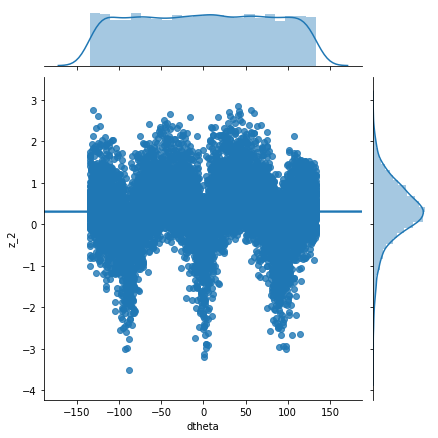

In [24]:
joint_plot(dtheta,z_enc[:,2],'reg','dtheta','z_2')

In [9]:
bins = 15
z_cond_dx_var = var_expl(features=z_enc,cond=dxs,bins=bins)
z_cond_dy_var = var_expl(features=z_enc,cond=dys,bins=bins)
z_cond_dtheta_var = var_expl(features=z_enc,cond=dtheta,bins=bins)
fve_zdx = (dxs.var()-z_cond_dx_var)/dxs.var()
fve_zdy = (dys.var()-z_cond_dy_var)/dys.var()
fve_zdtheta = (dtheta.var()-z_cond_dtheta_var)/dtheta.var()

In [10]:

recs = []
def agg_VE(fve,cond_name,out):
    bins = fve.shape[0]
    for i in np.arange(bins):
        rec = {
            'z_0':fve[i,0],
            'z_1':fve[i,1],
            'z_2':fve[i,2],
            'cond': cond_name
        }
        out.append(rec)
agg_VE(fve_zdx,cond_name='dx',out=recs)
agg_VE(fve_zdy,cond_name='dy',out=recs)
agg_VE(fve_zdtheta,cond_name='dtheta',out=recs)
fve_df = pd.DataFrame.from_records(recs)

In [22]:
fve_zdtheta

array([[-0.00992357,  0.3447647 , -0.03774331],
       [ 0.18205036,  0.41601556, -0.06022662],
       [ 0.04502041,  0.2435379 , -0.18043985],
       [ 0.07171865,  0.1841443 , -0.07588046],
       [ 0.08969788,  0.11984695, -0.02153111],
       [ 0.05610875,  0.1335027 , -0.02920793],
       [ 0.10644266,  0.0461984 , -0.0232543 ],
       [ 0.0725023 ,  0.03317246, -0.07280976],
       [-0.06333286, -0.03686187, -0.03203377],
       [-0.07544788, -0.03332371, -0.02328564],
       [ 0.03098579, -0.0784258 ,  0.02006223],
       [ 0.08470143, -0.10657493,  0.12383686],
       [ 0.01425202, -0.18841173,  0.12567569],
       [ 0.09420783, -0.23449965,  0.18093822],
       [ 0.07706239, -0.32308531,  0.28217043]])

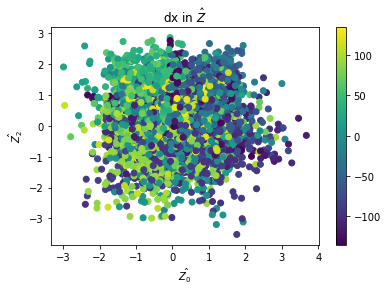

In [18]:
Z_color_scatter(z_enc,[0,2],dtheta,)